In [6]:
import pandas as pd
import numpy as np

# for box-cox transformation
from scipy import stats

# for min-max scaling
from mlxtend.preprocessing import minmax_scaling

# for plotting the data
import seaborn as sns
import matplotlib.pyplot as plt

# for dataframe storage
import os
os.makedirs("output_data", exist_ok=True)



### 1. Set Up Environment
Here we want to:

- Set up the seed
- Generate Data Points

This is pretty straightforward, we can use numpy to both set the seed for reproducibility, and generate the datapoints.

In [7]:
np.random.seed(0)
original_data = np.random.exponential(size=2000)

### 2. Min-Max Scaling
Scaling normalizes the datapoints in order to make it easier for the machine to understand.

For example, imagine you want the algorithm to look at age and salary. Salaries usually range from 50-100k, whereas age only is in the double digits. If we don't scale the data properly, a 1 year difference in age will be equivalent to a 1 dollar difference in salary.

But we can use min-max scaling to normalize the data so the machine can understand. The equation being: 
$$
X_{scaled} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

*Note: Usually before min-max scaling you want to convert units to standard ones when possible (so if you're comparing USD, Yen, and Euros, you want all of them to be measured in USD, so 1 EUR, 1 USD, 1 YEN, would turn into 1.05 USD, 1 USD, 0.0066 USD), but if the data can't be converted easily (like age and salary) simply using min-max scaling will work.*

Using mlxtend's minmax_scaling tool makes this part easy.

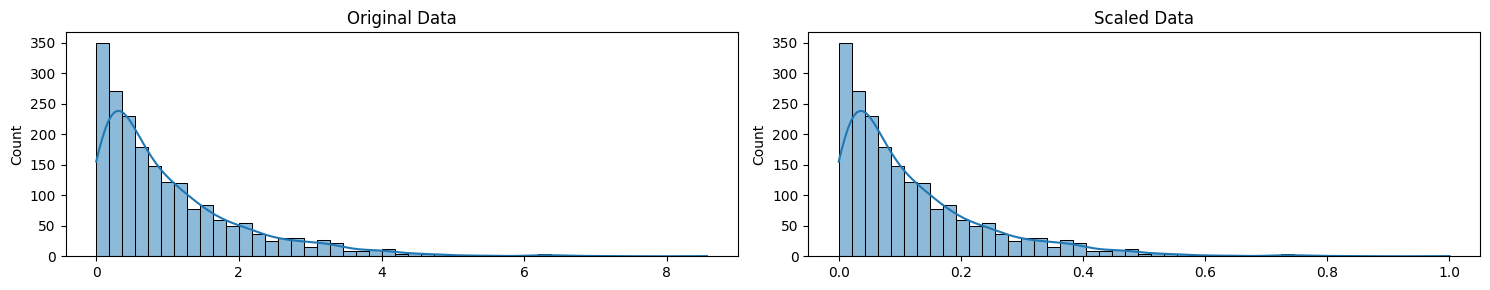

In [8]:

scaled_data = minmax_scaling(original_data, columns=0)

# plot everything so we can see
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
fig.tight_layout()
plt.show()

### 3. Normalize Data with Box-Cox Transformation
For some datasets where outliers dominate and that is not representative of the dataset, scaling will not be enough. That's where box-cox normalization comes in.
box-cox is best used on datasets where:

- Outliers dominate the dataset
- That is not representative of the population
- You want to delete the outliers, not flag them.

The equation for box-cox is as follows:

$$
y(\lambda) =
\begin{cases}
\frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\log(x) & \text{if } \lambda = 0.
\end{cases}
$$

Where λ is determined via maximum likelihood estimation, choosing the value that makes the curve best match a bell-shaped distribution.

We'll use scipy's stats object for the box-cox transformation.

*(the Box-Cox transformation requires that all x values be strictly positive, so we will add a small offset.)*

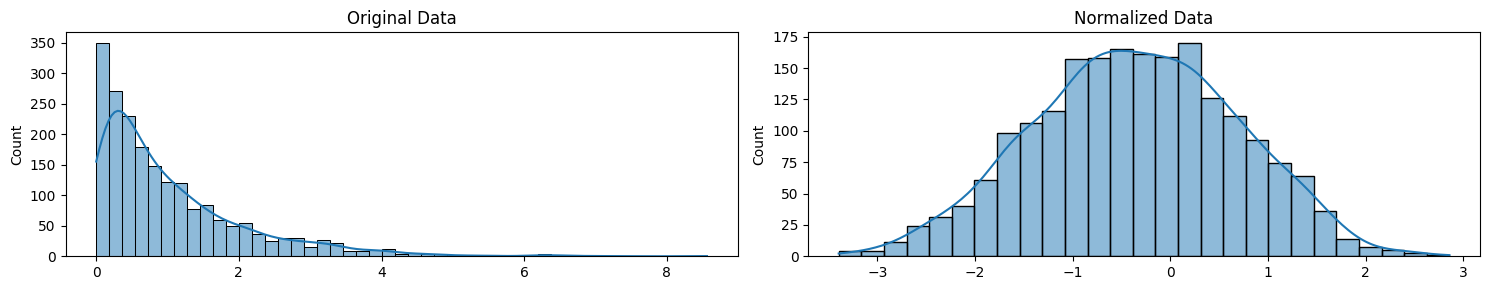

In [9]:
normalized_data = stats.boxcox(original_data + 1e-9)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")
fig.tight_layout()
plt.show()

In [10]:
# 5. Save the Data (Optional Step)
# Save CSV to the folder
pd.DataFrame({'original': original_data, 'scaled': scaled_data.flatten(), 'normalized': normalized_data[0]})\
    .to_csv("output_data/basic_scaling_normalization.csv", index=False)